In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns


In [2]:
d = pd.read_csv("Churn_Modelling.csv") 


In [3]:
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis

In [5]:
d.duplicated().sum()

0

In [6]:
d.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
d['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
d['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
d['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
#Change value in country column
d['Geography'] = d['Geography'].replace(['Germany'],'0')
d['Geography'] = d['Geography'].replace(['France'],'1')
d['Geography'] = d['Geography'].replace(['Spain'],'2')
#Change value in gender column
d['Gender'] = d['Gender'].replace(['Female'],'0')
d['Gender'] = d['Gender'].replace(['Male'],'1')

In [11]:
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df2 = d.drop('CustomerId', axis=1)


In [13]:
df2.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df2 = pd.get_dummies(d, drop_first=True)


In [15]:
df2.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_1,Geography_2,Gender_1
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,True,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,True,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,True,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False


# Machine Learning Model

In [16]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

# random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.15 %


# support vector machine

In [18]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


# XGBoost

In [19]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 84.55 %


# logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have already split your dataset into X_train, X_test, y_train, and y_test

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with increased max_iter and a chosen solver
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Train the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = logistic_model.predict(X_test_scaled)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy * 100, "%")


Accuracy Score: 77.4 %


In [21]:
# Random Forest and XGBoost Algorithm have the Best Accuracy

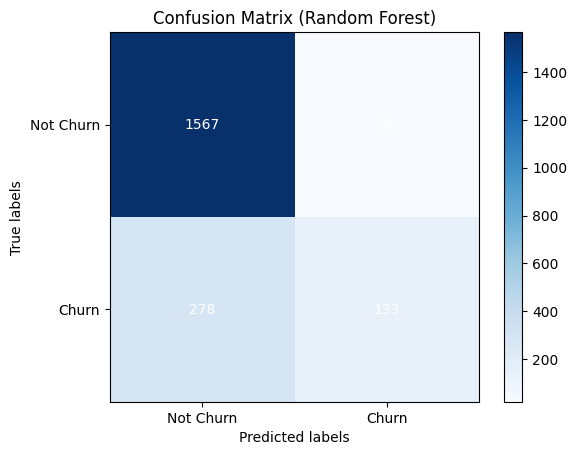

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

y_pred_rf = random_forest_model.predict(X_test_scaled)

confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap with blue color
plt.imshow(confusion_rf, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.yticks([0, 1], ['Not Churn', 'Churn'])

# Display the values in each cell of the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_rf[i, j]), horizontalalignment='center', verticalalignment='center', color='white')

plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'd' and 'Exited' is the target column
X = d.drop('Exited', axis=1)
y = d['Exited']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('num', StandardScaler())])
categorical_transformer = Pipeline(steps=[('cat', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Combine preprocessing and model into a single pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')


Accuracy on the test set: 0.86


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'd' and 'Exited' is the target column
X = d.drop('Exited', axis=1)
y = d['Exited']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('num', StandardScaler())])
categorical_transformer = Pipeline(steps=[('cat', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Combine preprocessing and model into a single pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print the predicted labels for the test set
print('Predicted labels on the test set:')
print(y_pred)


Predicted labels on the test set:
[0 0 0 ... 0 0 0]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'd' and 'Exited' is the target column
X = d.drop('Exited', axis=1)
y = d['Exited']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('num', StandardScaler())])
categorical_transformer = Pipeline(steps=[('cat', OneHotEncoder(handle_unknown='ignore'))])

# Use ColumnTransformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Combine preprocessing and model into a single pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Get predicted probabilities on the test set
predicted_probabilities = rf_model.predict_proba(X_test)

# Print the predicted probabilities for both classes
print('Predicted probabilities for positive class (Exited):')
print(predicted_probabilities[:, 1])  # Probabilities for class 1 (Exited)

print('Predicted probabilities for negative class (Not Exited):')
print(predicted_probabilities[:, 0])  # Probabilities for class 0 (Not Exited)


Predicted probabilities for positive class (Exited):
[0.03 0.06 0.21 ... 0.47 0.14 0.2 ]
Predicted probabilities for negative class (Not Exited):
[0.97 0.94 0.79 ... 0.53 0.86 0.8 ]
